In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

## Reading the dataset

In [2]:
df = pd.read_excel(r'Real estate valuation data set.xlsx')
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [3]:
#Now let us check the datatypes f the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
No                                        414 non-null int64
X1 transaction date                       414 non-null float64
X2 house age                              414 non-null float64
X3 distance to the nearest MRT station    414 non-null float64
X4 number of convenience stores           414 non-null int64
X5 latitude                               414 non-null float64
X6 longitude                              414 non-null float64
Y house price of unit area                414 non-null float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


## The data of transaction seems to be in the year.month format. 
I think date of transaction should not influence the price of the house 
but I will keep the data as it is in the float format and there could 
be a pattern such as houses one year back could be cheaper than current price

## Dropping the No column

In [4]:
df_re = df.drop(['No'], axis = 1)

In [5]:
df_re.head(10)

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
5,2012.666667,7.1,2175.03000,3,24.96305,121.51254,32.1
6,2012.666667,34.5,623.47310,7,24.97933,121.53642,40.3
7,2013.416667,20.3,287.60250,6,24.98042,121.54228,46.7
8,2013.500000,31.7,5512.03800,1,24.95095,121.48458,18.8
9,2013.416667,17.9,1783.18000,3,24.96731,121.51486,22.1


## Univariate analysis

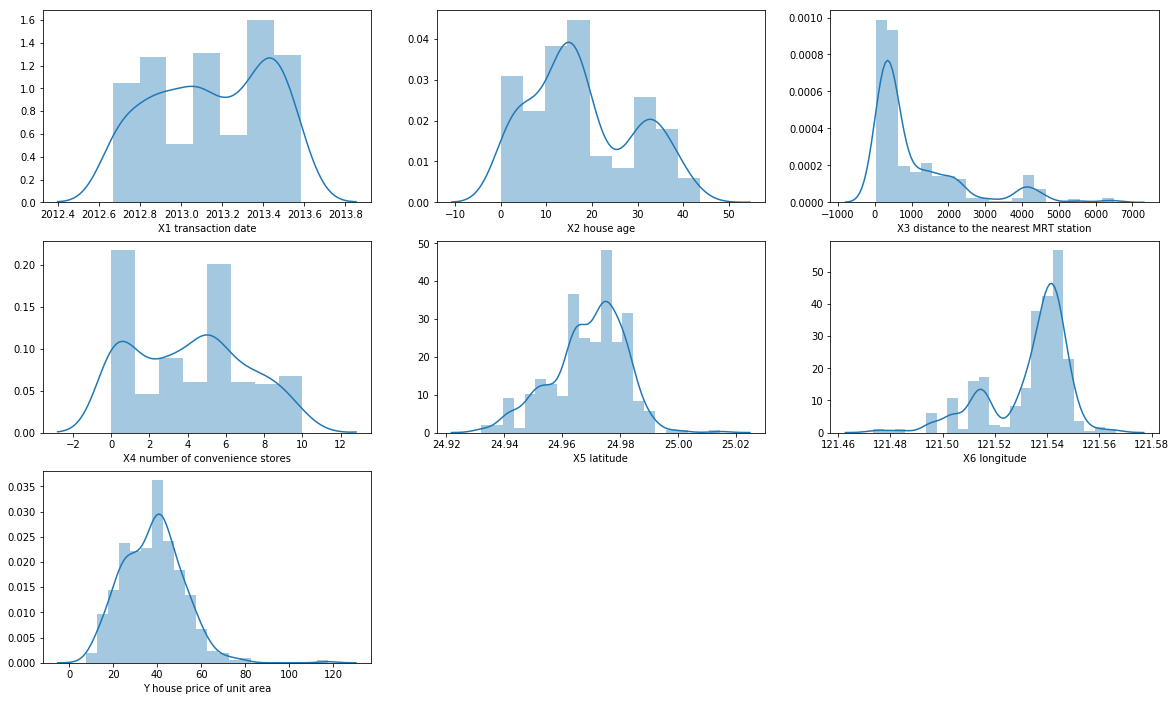

In [6]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.distplot(df_re['X1 transaction date'])
plt.subplot(3,3,2)
sns.distplot(df_re['X2 house age'])
plt.subplot(3,3,3)
sns.distplot(df_re['X3 distance to the nearest MRT station'])
plt.subplot(3,3,4)
sns.distplot(df_re['X4 number of convenience stores'])
plt.subplot(3,3,5)
sns.distplot(df_re['X5 latitude'])
plt.subplot(3,3,6)
sns.distplot(df_re['X6 longitude'])
plt.subplot(3,3,7)
sns.distplot(df_re['Y house price of unit area'])

plt.show()

## Now let us check the scatter plots

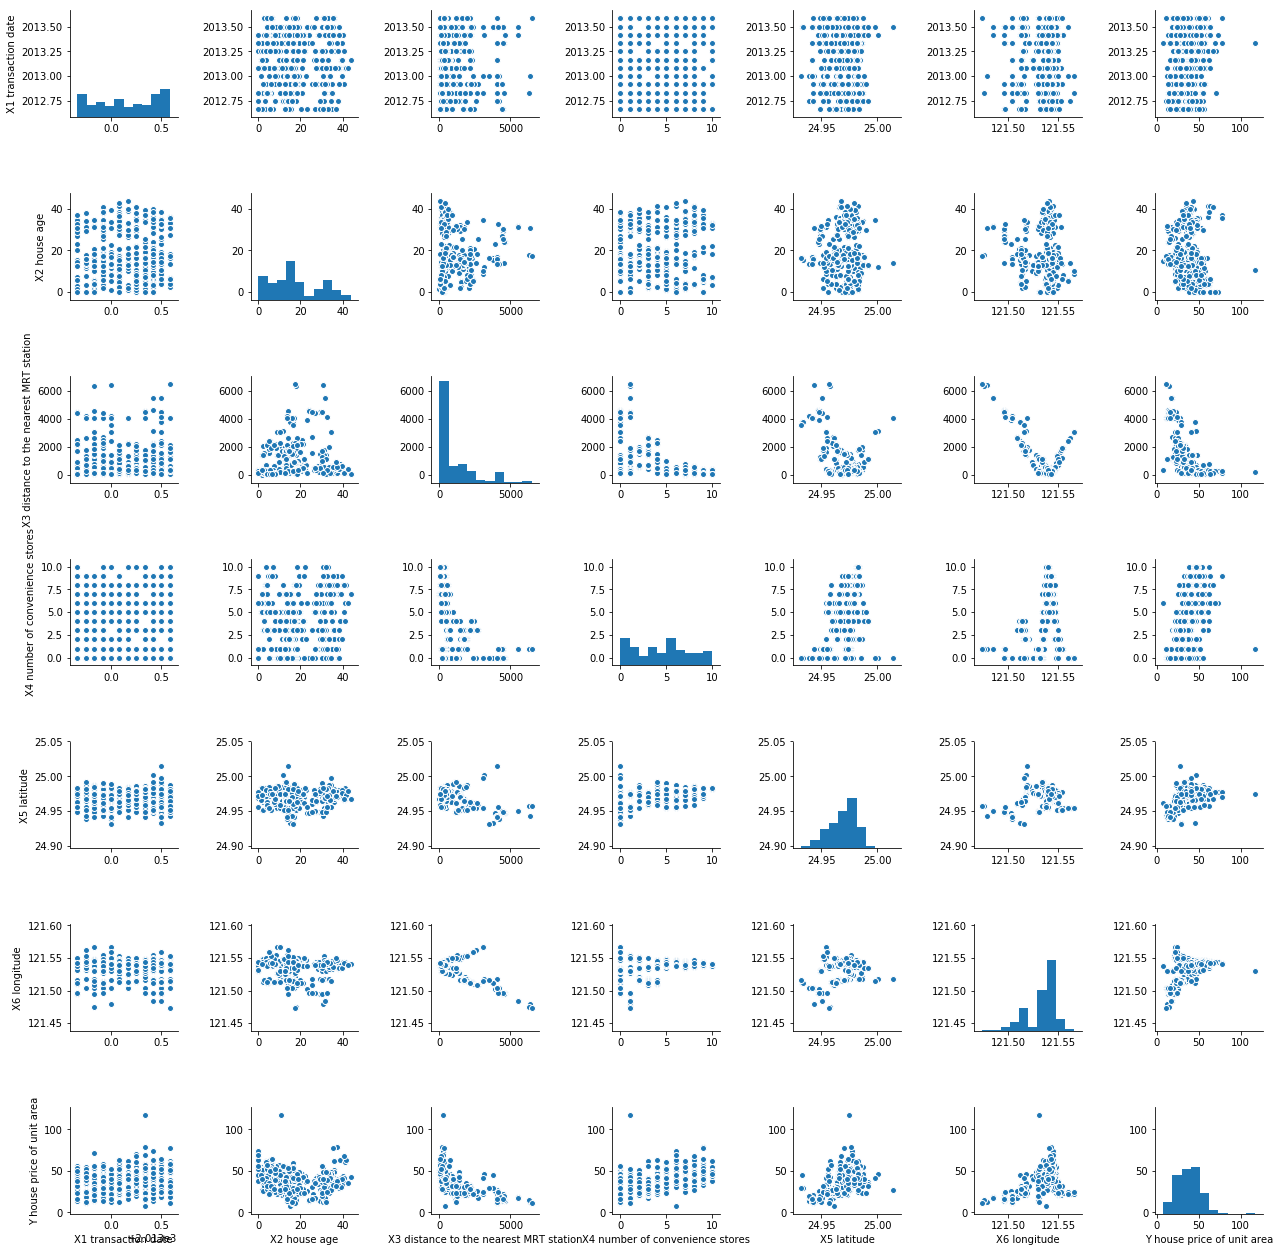

In [7]:
plt.figure(figsize=(22, 12))
sns.pairplot(df_re)
plt.show()

#### Seems the date of transaction doesn't have relationship with the price. I will not drop it now. We will remove it after checking the VIF value

## Now let us check the correlation matrix

In [8]:
# Retrieve the correlation matrix
corr = df_re.corr()
corr

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
X1 transaction date,1.000000,0.017542,0.060880,0.009544,0.035016,-0.041065,0.087529
X2 house age,0.017542,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,0.009544,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,0.035016,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.041065,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,0.087529,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


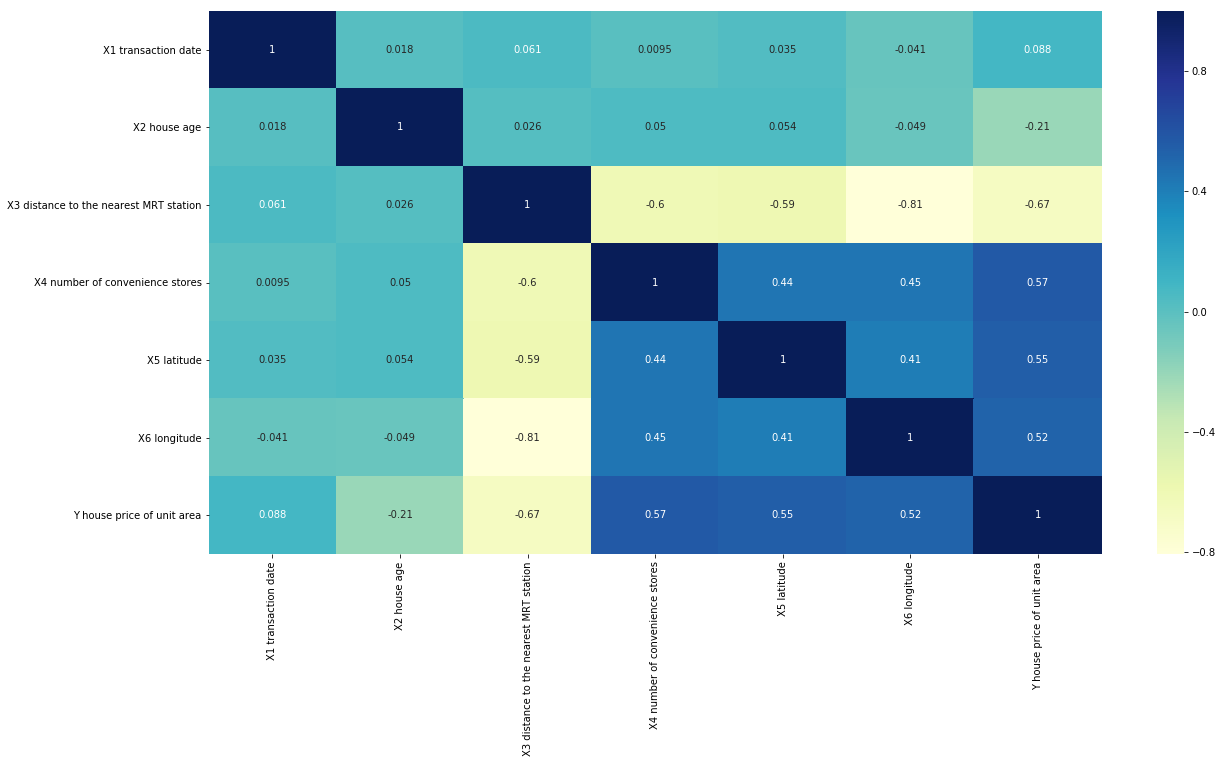

In [9]:
#Now let us printthe heat map

plt.figure(figsize=(20, 10))

sns.heatmap(corr, cmap="YlGnBu", annot=True)
plt.show()

### Looking at the heat map, it looks aparent that transaction date has no influence on the price and hence can be deleted but I will still check for the VIF value. 

## Now let us check for the null values

In [10]:
df_re.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
X1 transaction date                       414 non-null float64
X2 house age                              414 non-null float64
X3 distance to the nearest MRT station    414 non-null float64
X4 number of convenience stores           414 non-null int64
X5 latitude                               414 non-null float64
X6 longitude                              414 non-null float64
Y house price of unit area                414 non-null float64
dtypes: float64(6), int64(1)
memory usage: 22.7 KB


### Awesome!! the dataset has no null values

## Let us check for the outliers

In [11]:
df_re.describe()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [48]:
# Let us remove outliers greater than 3 standard deviations
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df_re))
print(z)
print(df_re.shape)
df_re = df_re[(z < 9).all(axis=1)]
print(df_re.shape)

[[0.82472165 1.25562833 0.79249504 ... 1.12542986 0.44876222 0.00590088]
 [0.82472165 0.15708622 0.61661163 ... 0.91244418 0.40113894 0.3105072 ]
 [1.54224386 0.38779067 0.41401527 ... 1.48686011 0.68818339 0.6857819 ]
 ...
 [0.35876111 0.09556786 0.54967846 ... 0.82289338 0.42397202 0.19277396]
 [0.52885105 0.84478419 0.77668389 ... 0.18475479 0.4768143  1.06841493]
 [1.24637326 0.98539758 0.78807071 ... 0.42757905 0.63534112 1.90726426]]
(414, 7)
(414, 7)


## Model Buling

In [13]:
# Let us split the data into test and train sets
from sklearn.cross_validation import train_test_split
df_train, df_test = train_test_split(df_re, train_size=0.7, test_size=0.3, random_state=100)

In [14]:
df_re.columns

Index(['X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [15]:
#Now let us scale all the variables using standard scaler
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
vars = ['X1 transaction date', 'X2 house age', 
           'X3 distance to the nearest MRT station', 
           'X4 number of convenience stores', 'X5 latitude', 
           'X6 longitude', 'Y house price of unit area']

df_train[vars] = standard_scaler.fit_transform(df_train[vars])
df_train.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
287,-0.506905,0.084035,-0.518337,0.355787,-1.114728,0.475403,-0.332797
31,-1.391185,0.983203,-0.284366,1.012798,1.096330,0.102528,-0.886472
209,-1.096425,1.432787,-0.734984,1.341304,0.373246,0.655434,0.227887
239,1.261654,-0.011069,-0.232518,-1.286743,-0.410998,0.973210,-0.557070
47,1.556414,1.527891,-0.382010,-0.301225,0.540468,0.299217,1.671647


In [16]:
# Now let us distinguish the x and y axis components
y_train = df_train.pop('Y house price of unit area')
X_train = df_train

In [17]:
#Now let us build the model with all the variables
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
# Print the coefficients and intercept
print(lm.coef_)
print(lm.intercept_)

[ 0.12810791 -0.2337262  -0.47406462  0.22486207  0.17413224 -0.05709354]
1.651548332989636e-14


In [19]:
#Now let us build the model using RFE. Let us consider all the variables as we have very less 
#variables and then we elliminate the variables one by one.
from sklearn.feature_selection import RFE

#Let us do RFE for top 4 features
lm = LinearRegression()
rfe_1 = RFE(lm, 4)

rfe_1.fit(X_train, y_train)

list(zip(X_train.columns,rfe_1.support_,rfe_1.ranking_))

[('X1 transaction date', False, 2),
 ('X2 house age', True, 1),
 ('X3 distance to the nearest MRT station', True, 1),
 ('X4 number of convenience stores', True, 1),
 ('X5 latitude', True, 1),
 ('X6 longitude', False, 3)]

In [20]:
#Selected features
selected_cols = X_train.columns[rfe_1.support_]
selected_cols

Index(['X2 house age', 'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude'],
      dtype='object')

In [21]:
#Features not contributing much for pricing
X_train.columns[~rfe_1.support_]

Index(['X1 transaction date', 'X6 longitude'], dtype='object')

In [22]:
#Now let us use stats model to check the details
import statsmodels.api as sm  
X_train_rfe1 = X_train[selected_cols]
X_train_rfe1 = sm.add_constant(X_train_rfe1)

lm = sm.OLS(y_train,X_train_rfe1).fit()
#printing summary
print(lm.summary())

                                OLS Regression Results                                
Dep. Variable:     Y house price of unit area   R-squared:                       0.541
Model:                                    OLS   Adj. R-squared:                  0.535
Method:                         Least Squares   F-statistic:                     83.83
Date:                        Sat, 19 Oct 2019   Prob (F-statistic):           6.48e-47
Time:                                15:28:30   Log-Likelihood:                -297.42
No. Observations:                         289   AIC:                             604.8
Df Residuals:                             284   BIC:                             623.2
Df Model:                                   4                                         
Covariance Type:                    nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

In [23]:
#Now let us check the VIF values
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_df = pd.DataFrame()
vif_df['Features'] = X_train_rfe1.columns
vif_df['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif_df['VIF'] = round(vif_df['VIF'], 2)
vif_df = vif_df.sort_values(by = "VIF", ascending = False)
vif_df

,Features,VIF
2,X3 distance to the nearest MRT station,1.99
3,X4 number of convenience stores,1.60
4,X5 latitude,1.57
1,X2 house age,1.01
0,const,1.00


Text(0.5,0,'Errors')

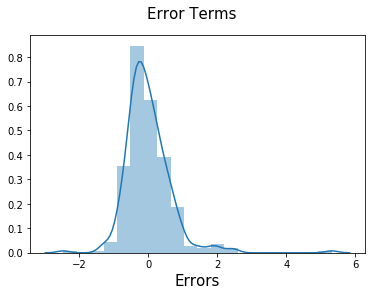

In [24]:
#VIF is quite small so we may not need to do further iterations.
#Now let us do the residual analysis on the train data
y_train_price = lm.predict(X_train_rfe1)

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Errors', fontsize = 15)

## Error terms are following normal distribution curve. Seems the model is working fine.
Now let us try the model on the test data

In [25]:
X_train_rfe1.columns

Index(['const', 'X2 house age', 'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude'],
      dtype='object')

In [26]:
df_test[vars] = standard_scaler.transform(df_test[vars])


In [27]:
df_test.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
121,1.261654,-0.400132,-0.494713,0.355787,-0.270872,0.313312,0.725493
353,1.261654,-1.221487,0.761384,-0.301225,-0.438095,-1.258272,-0.444933
96,0.966894,-1.022633,-0.799622,1.669810,0.439825,0.680420,1.531476
43,-1.391185,1.398203,-0.479113,0.684292,1.457871,0.674654,-0.248694
125,0.082614,-1.480862,-0.721357,0.684292,-0.227518,0.538830,0.767545


In [28]:
# Now let us split into X and target Y
y_test = df_test.pop('Y house price of unit area')
X_test = df_test

In [29]:
# Let us add the constant now
X_test_rfe = sm.add_constant(X_test)
X_test_rfe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125 entries, 121 to 161
Data columns (total 7 columns):
const                                     125 non-null float64
X1 transaction date                       125 non-null float64
X2 house age                              125 non-null float64
X3 distance to the nearest MRT station    125 non-null float64
X4 number of convenience stores           125 non-null float64
X5 latitude                               125 non-null float64
X6 longitude                              125 non-null float64
dtypes: float64(7)
memory usage: 7.8 KB


In [30]:
#Let us drop the column "X6 longitude" which was not selected in RFE
X_test_rfe = X_test_rfe.drop('X6 longitude', axis = 1)
X_test_rfe = X_test_rfe.drop('X1 transaction date', axis = 1)
#X_test_rfe = X_test_rfe.drop('X5 latitude', axis = 1)



In [31]:
#Now let us add the constant
# Add a constant to the test set created
X_test_rfe = sm.add_constant(X_test_rfe)
X_test_rfe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125 entries, 121 to 161
Data columns (total 5 columns):
const                                     125 non-null float64
X2 house age                              125 non-null float64
X3 distance to the nearest MRT station    125 non-null float64
X4 number of convenience stores           125 non-null float64
X5 latitude                               125 non-null float64
dtypes: float64(5)
memory usage: 5.9 KB


Text(0,0.5,'y_pred')

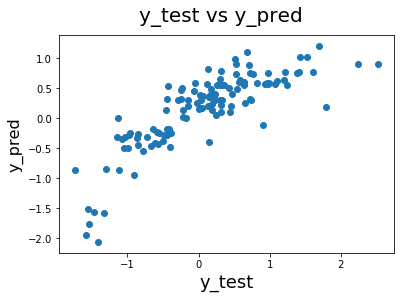

In [32]:
#Now let us make th predictions
y_pred = lm.predict(X_test_rfe)

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16)


In [33]:
#Now let us check the r2_score
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6624680553750821

## The r2_score score is not very good. The score didn't improve significantly even after removing the outliers. Possibly we may need to think for below: 

1) Use PCA to find the principal components and then perform the Linear Regression
2) Deep learning/Newral Network based model.

## So let us try the PCA first

In [34]:
from sklearn.decomposition import PCA
pca = PCA(svd_solver='auto', random_state=70)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=70,
  svd_solver='auto', tol=0.0, whiten=False)

In [35]:
column_names_list = list(X_train.columns)
PCA_df = pd.DataFrame({'PCA_comp_1':pca.components_[0],'PCA_comp_2':pca.components_[1], 'Features':column_names_list})

In [36]:
PCA_df.head(100)

,PCA_comp_1,PCA_comp_2,Features
0,0.039318,0.652644,X1 transaction date
1,0.009934,0.713553,X2 house age
2,0.570422,0.068784,X3 distance to the nearest MRT station
3,-0.457381,0.138955,X4 number of convenience stores
4,-0.444774,0.160866,X5 latitude
5,-0.515706,-0.122394,X6 longitude


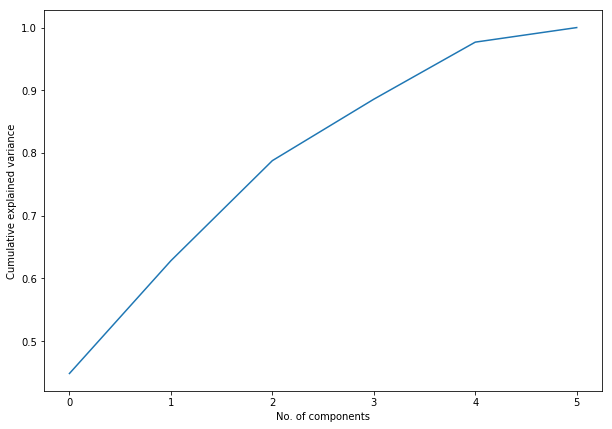

In [37]:
#Now let us check the cumulative variance vs number of components explaining the variance
fig = plt.figure(figsize = (10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('No. of components')
plt.ylabel('Cumulative explained variance')
plt.show()

## From the graph it is evident that we need to consider 4 to 5 components

In [38]:
#Now let us build the PCA dataset aiming for 95% accuracy
pca_95 = PCA(0.95)
train_df_pca_95 = pca_95.fit_transform(X_train)
train_df_pca_95.shape


(289, 5)

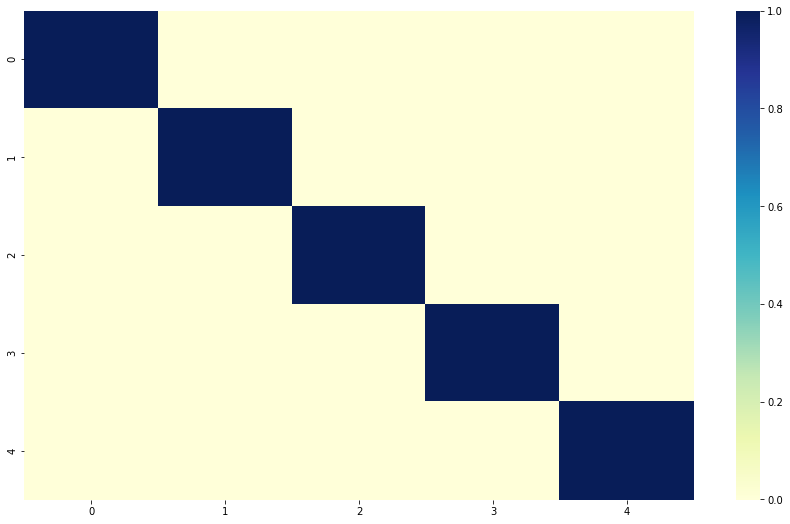

In [39]:
#Now let us plot the heat map for the principal components
from sklearn.decomposition import IncrementalPCA
pca_95 = IncrementalPCA(n_components=5)
X_train_df_pca_95 = pca_95.fit_transform(X_train)
X_test_df_pca_95 =pca_95.transform(X_test)

pca_corr_matrix = np.corrcoef(X_train_df_pca_95.transpose())

#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (15,9))
sns.heatmap(pca_corr_matrix, cmap="YlGnBu")

In [40]:
corrmatrix_pca = pca_corr_matrix - np.diagflat(pca_corr_matrix.diagonal())
print("Max Correlation:",corrmatrix_pca.max(), ", Min Correlation: ", corrmatrix_pca.min(),)

Max Correlation: 0.00023571144724069185 , Min Correlation:  -0.0011379082887099554


## The Maximum and the minimum values are very close to 0 so it looks like PCA is going to help build the model with significant accuracy

## Now let us build the linear regression model using the variables identified by PCA

In [41]:
from sklearn.metrics import mean_squared_error

lr_pca = linear_model.LinearRegression()
# Train the model using the principal components of the transformed training sets
lr_pca.fit(X_train_df_pca_95, y_train)
#Let us predict for the test data now
y_pred_pca = lr_pca.predict(X_test_df_pca_95)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred_pca))
#R Squared value
print('R2 score: %.2f' % r2_score(y_test, y_pred_pca))


Mean squared error: 0.23
R2 score: 0.66


## As we see, the R Squared value has not improved. It is evident that the straight line or the linear regression will not help in this case.